<a href="https://colab.research.google.com/github/Mariam-mostafa3/House-Price-Prediction/blob/main/house_price_prediction_using__linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [144]:
#read data
data=pd.read_csv('/content/Real_Estate.csv')

In [145]:
#data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [146]:
#features
features=data.drop(['House price of unit area'],axis=1)
features.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946


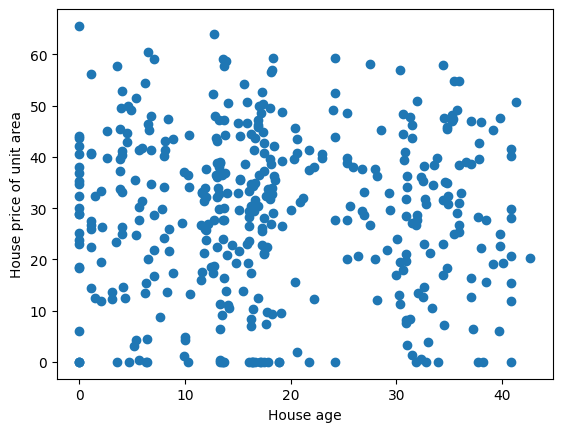

In [147]:
#visualization
plt.scatter(data['House age'],data['House price of unit area'])
plt.xlabel('House age')
plt.ylabel('House price of unit area')
plt.show()

In [148]:
#data preprocessing
data=data.drop(['Transaction date'],axis=1)


In [149]:
data.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,8.5,967.4000,6,25.011037,121.479946,21.654710


In [150]:
#features
features=data.drop(['House price of unit area'],axis=1)
features.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,13.3,4082.0150,8,25.007059,121.561694
1,35.5,274.0144,2,25.012148,121.546990
2,1.1,1978.6710,10,25.003850,121.528336
3,22.2,1055.0670,5,24.962887,121.482178
4,8.5,967.4000,6,25.011037,121.479946


In [151]:
#labels
labels=data['House price of unit area']
labels.head()

0     6.488673
1    24.970725
2    26.694267
3    38.091638
4    21.654710
Name: House price of unit area, dtype: float64

In [152]:
#splitting data train,test
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=2)

In [153]:
#model
model=LinearRegression()

In [154]:
labels_train=pd.DataFrame(labels_train)

In [155]:
#fitting the model
model.fit(features_train,labels_train)

LinearRegression()

In [156]:
#prrediction
prediction=model.predict(features_test)

In [157]:
pd.concat([pd.DataFrame(labels_test),pd.DataFrame(prediction)],axis=1,join='inner')

,House price of unit area,0
32,30.855391,42.526039
70,8.784265,41.587940
53,22.210301,27.342788
20,47.355551,39.442270
77,29.711190,37.060083
2,26.694267,32.551413
25,0.000000,32.117205
55,31.596285,6.616120
24,12.570276,33.158157
7,44.116585,28.752810


In [158]:
#label test reset
labels_test=labels_test.reset_index(drop=True)

In [159]:
#evaluation  using r2_score
prediction_evaluation=r2_score(labels_test,prediction)
print(prediction_evaluation)

0.3785220350239663


In [160]:
model_evaluation=model.score(features_test,labels_test)
print(model_evaluation)

0.3785220350239663
